In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

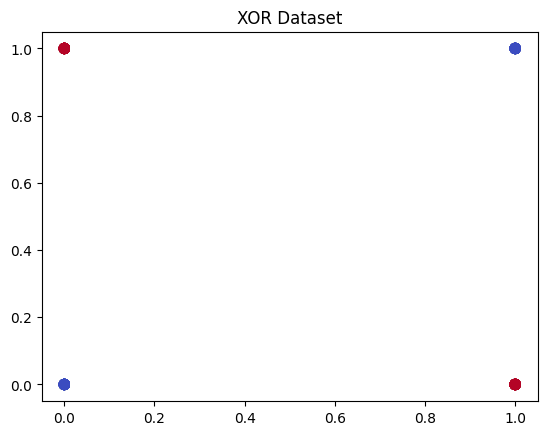

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate XOR dataset
def generate_xor_dataset(n):
    X = np.random.randint(0, 2, size=(n, 2))
    y = np.logical_xor(X[:, 0], X[:, 1]).astype(int)
    return X, y

# Generate 200 training and 200 test instances
X, y = generate_xor_dataset(400)

# Split into training and testing sets (200 training, 200 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Visualize the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=50)
plt.title("XOR Dataset")
plt.show()


In [3]:
from sklearn.neural_network import MLPClassifier

# Create and train a basic MLP model
mlp = MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=1000, activation='relu', solver='adam')
mlp.fit(X_train, y_train)

# Evaluate
print(f"MLP Train Accuracy: {mlp.score(X_train, y_train):.4f}")
print(f"MLP Test Accuracy: {mlp.score(X_test, y_test):.4f}")


MLP Train Accuracy: 1.0000
MLP Test Accuracy: 1.0000


In [4]:
# MLP with L1 regularization
mlp_l1 = MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=1000, activation='relu', solver='adam', alpha=0.001)
mlp_l1.fit(X_train, y_train)

# Evaluate
print(f"MLP L1 Train Accuracy: {mlp_l1.score(X_train, y_train):.4f}")
print(f"MLP L1 Test Accuracy: {mlp_l1.score(X_test, y_test):.4f}")


MLP L1 Train Accuracy: 1.0000
MLP L1 Test Accuracy: 1.0000


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
# MLP with L2 regularization
mlp_l2 = MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=1000, activation='relu', solver='adam', alpha=0.01)
mlp_l2.fit(X_train, y_train)

# Evaluate
print(f"MLP L2 Train Accuracy: {mlp_l2.score(X_train, y_train):.4f}")
print(f"MLP L2 Test Accuracy: {mlp_l2.score(X_test, y_test):.4f}")


MLP L2 Train Accuracy: 1.0000
MLP L2 Test Accuracy: 1.0000


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train_poly, y_train)

# Evaluate
print(f"Logistic Regression Train Accuracy: {log_reg.score(X_train_poly, y_train):.4f}")
print(f"Logistic Regression Test Accuracy: {log_reg.score(X_test_poly, y_test):.4f}")


Logistic Regression Train Accuracy: 1.0000
Logistic Regression Test Accuracy: 1.0000


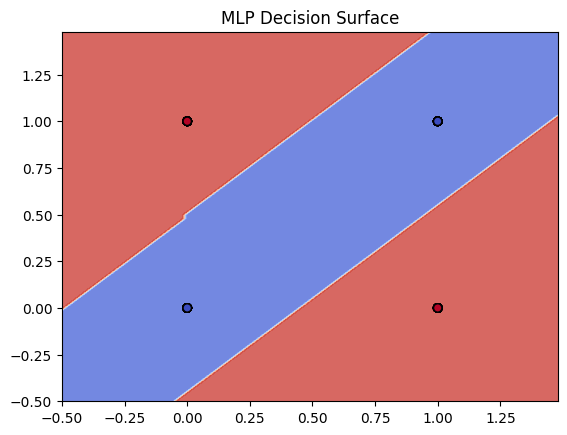

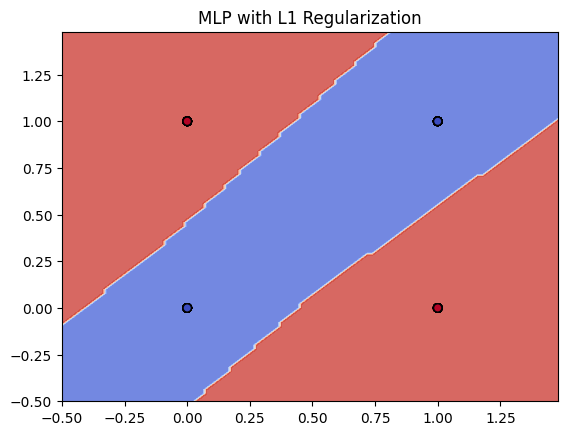

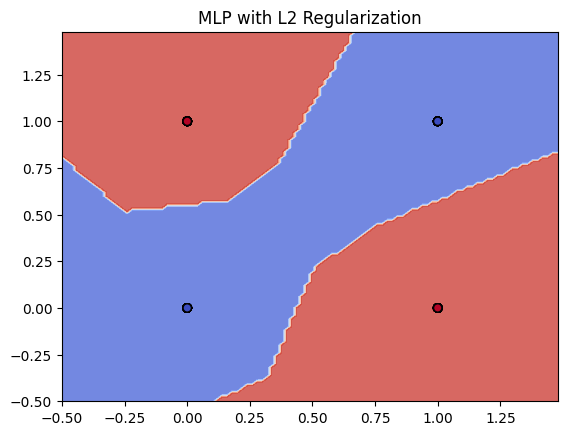

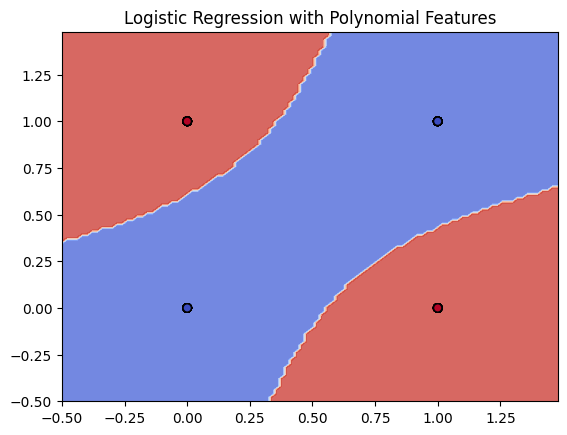

In [7]:
def plot_decision_surface(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.show()

# Plot for MLP
plot_decision_surface(mlp, X_train, y_train, "MLP Decision Surface")

# Plot for MLP with L1 regularization
plot_decision_surface(mlp_l1, X_train, y_train, "MLP with L1 Regularization")

# Plot for MLP with L2 regularization
plot_decision_surface(mlp_l2, X_train, y_train, "MLP with L2 Regularization")

# Plot for Logistic Regression with additional features
# Corrected function to handle polynomial features
def plot_decision_surface_with_poly(model, poly, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Transform the grid points using the same polynomial transformation
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_poly = poly.transform(grid)

    # Predict on the transformed grid points
    Z = model.predict(grid_poly)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.show()

# Plot for Logistic Regression with Polynomial Features
plot_decision_surface_with_poly(log_reg, poly, X_train, y_train, "Logistic Regression with Polynomial Features")

